#Vishalakshi
#102017189
#CS8

###Importing Necessary Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [10]:
dataset = pd.read_csv('Steel_industry_data_.csv')
dataset.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


###Pre-Processing of Dataset

In [11]:
dataset.shape

(35040, 11)

In [12]:
dataset.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [16]:
dataset = dataset.drop(['WeekStatus','Day_of_week','date'],axis=1)

<Axes: xlabel='Load_Type', ylabel='count'>

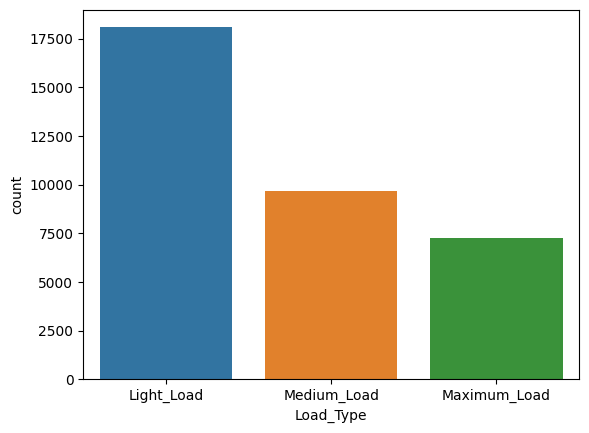

In [17]:
sns.countplot(x = 'Load_Type', data=dataset)

In [18]:
X = dataset.iloc[:,0:-1]
y = dataset['Load_Type']

In [19]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.72410486, -0.61851634, -0.52138505, ..., -0.38941049,
         0.51326762, -1.67801526],
       [-0.69928718, -0.52591107, -0.52138505, ..., -0.72977211,
         0.51326762, -1.64192891],
       [-0.72201181, -0.59827811, -0.52138505, ..., -0.54426446,
         0.51326762, -1.60584256],
       ...,
       [-0.70586536, -0.60502418, -0.51195662, ..., -0.20918795,
         0.51261093,  1.67801526],
       [-0.70586536, -0.61177026, -0.50656895, ..., -0.15105165,
         0.51195425,  1.71410161],
       [-0.70915445, -0.61422338, -0.51195662, ..., -0.17747724,
         0.51261093, -1.71410161]])

###Creating 10 samples with 70-30 ratio of Training and Testing Set

In [20]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [21]:
samples

[(       Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
  679         3.31                                  4.32   
  18784      97.85                                 31.68   
  24093       3.31                                  5.80   
  19057      30.92                                  5.58   
  15253       3.78                                  0.00   
  ...          ...                                   ...   
  20757       2.84                                  6.08   
  32103      28.58                                  0.04   
  30403     114.91                                 49.97   
  21243       2.66                                  5.08   
  2732       90.97                                 56.41   
  
         Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
  679                                    0.00       0.00   
  18784                                  0.00       0.04   
  24093                                  0.00       0.00   
  19057                              

### Creation of a Fitness Function

In [22]:
kernels = ['poly', 'linear', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [23]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [24]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.54 Best Kernel =  poly Best Nu =  0.86 Best Epsilon =  4.77
Best Accuracy =  0.57 Best Kernel =  poly Best Nu =  3.97 Best Epsilon =  9.52
Best Accuracy =  0.53 Best Kernel =  rbf Best Nu =  7.09 Best Epsilon =  6.59
Best Accuracy =  0.55 Best Kernel =  rbf Best Nu =  5.47 Best Epsilon =  1.57
Best Accuracy =  0.54 Best Kernel =  rbf Best Nu =  4.58 Best Epsilon =  2.87
Best Accuracy =  0.56 Best Kernel =  rbf Best Nu =  9.05 Best Epsilon =  2.0
Best Accuracy =  0.58 Best Kernel =  rbf Best Nu =  2.92 Best Epsilon =  0.29
Best Accuracy =  0.55 Best Kernel =  rbf Best Nu =  5.93 Best Epsilon =  2.03
Best Accuracy =  0.58 Best Kernel =  poly Best Nu =  2.89 Best Epsilon =  2.55
Best Accuracy =  0.67 Best Kernel =  linear Best Nu =  4.41 Best Epsilon =  0.58


###Creation of a Result Table

In [25]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.54,poly,0.86,4.77
1,2,0.57,poly,3.97,9.52
2,3,0.53,rbf,7.09,6.59
3,4,0.55,rbf,5.47,1.57
4,5,0.54,rbf,4.58,2.87
5,6,0.56,rbf,9.05,2.00
6,7,0.58,rbf,2.92,0.29
7,8,0.55,rbf,5.93,2.03
8,9,0.58,poly,2.89,2.55
9,10,0.67,linear,4.41,0.58


### Plotting of the Convergence Graph/Linear Curve

In [26]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [27]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [28]:
train_sizes

array([  220,   666,  1112,  1558,  2004,  2450,  2896,  3342,  3788,
        4234,  4680,  5126,  5572,  6018,  6464,  6910,  7356,  7802,
        8248,  8694,  9140,  9586, 10032, 10478, 10924, 11370, 11816,
       12262, 12708, 13154, 13600, 14046, 14492, 14938, 15384, 15830,
       16276, 16722, 17168, 17614, 18060, 18506, 18952, 19398, 19844,
       20290, 20736, 21182, 21628, 22075])

In [29]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

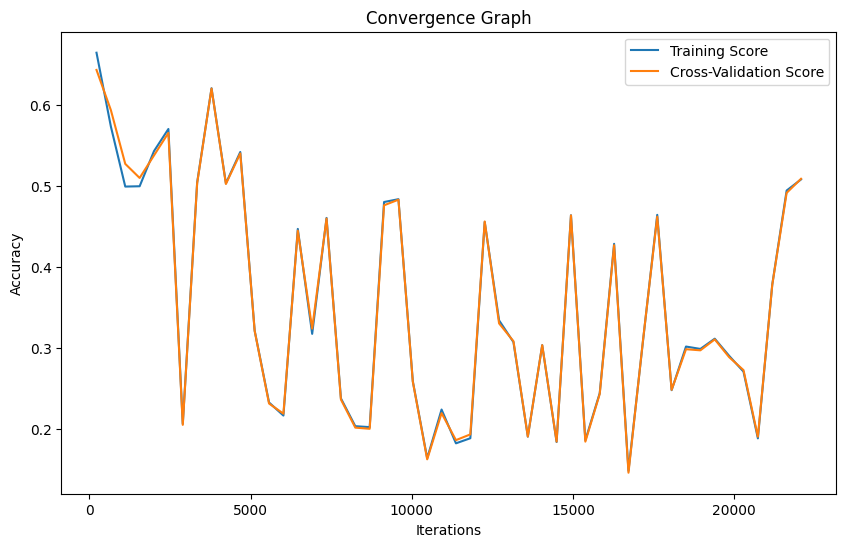

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()